In [11]:
from  main import *
## Model m4.3
d = pd.read_csv('./data/Howell1.csv', sep=';')
d = d[d.age > 18]
#self.df["weight.per.g"].pipe(lambda x: (x - x.mean()) / x.std())
d.weight = d.weight - d.weight.mean()
d.age = d.age - d.age.mean()
formula = dict(main1 = 'height ~ Normal(mu,sigma)',
            likelihood = 'mu ~ alpha + beta * weight',
            prior1 = 'sigma ~ Uniform(0,50)',
            prior2 = 'alpha ~ Normal(178,20)',
            prior3 = 'beta ~ Normal(0,1)')    

self = model(formula, df = d, float = 32)
self.fit(observed_data = dict(height =d.height.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

# expected 
#           Mean    StdDev  5.5%    94.5%   a   b   sigma
#   a       154.60  0.27    154.17  155.03  1   0   0
#   b       0.91    0.04    0.84    0.97    0   1   0
#   sigma   5.07    0.19    4.77    5.38    0   0   1

2024-02-26 14:40:23.686351: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:40:23.686420: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:40:23.686434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:40:23.686573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-26 14:40:23.686579: I tensorflow/core/common_runtime/gpu/gpu

[<tfp.bijectors.Identity 'identity' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_1' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>, <tfp.bijectors.Identity 'identity_2' batch_shape=[] forward_min_event_ndims=0 inverse_min_event_ndims=0 dtype_x=? dtype_y=?>]


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],5.14,0.20,4.82,5.44
beta[0],0.91,0.04,0.84,0.97
alpha[0],154.65,0.27,154.18,155.04


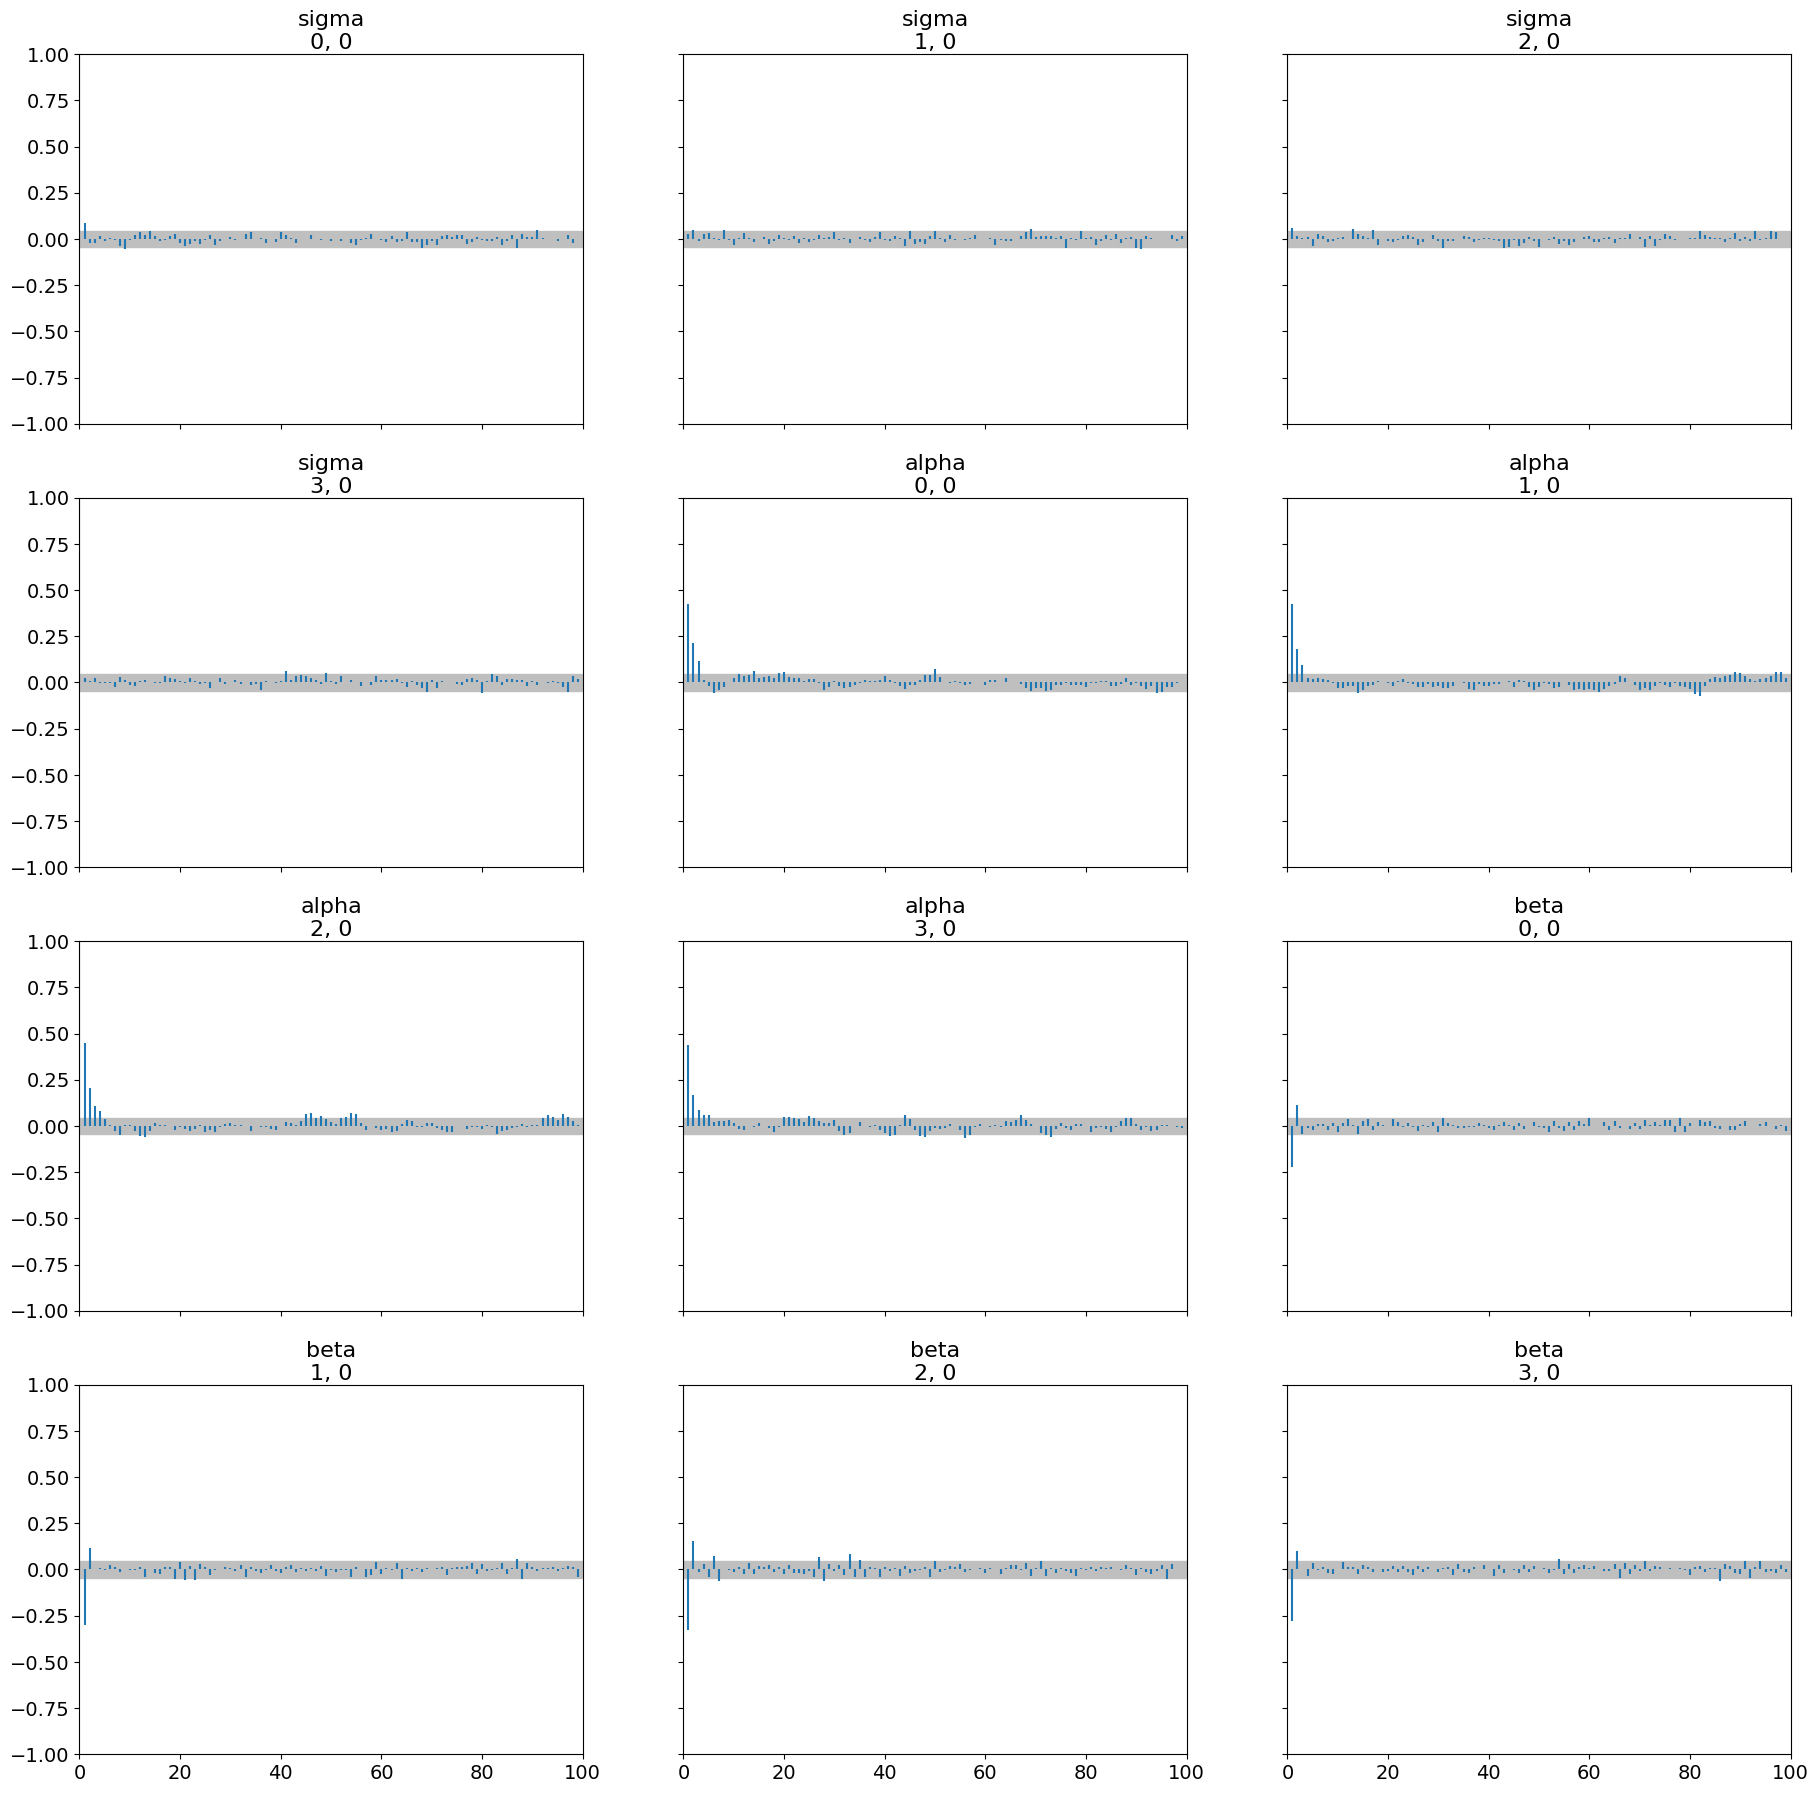

In [12]:
self.diag_autocor()

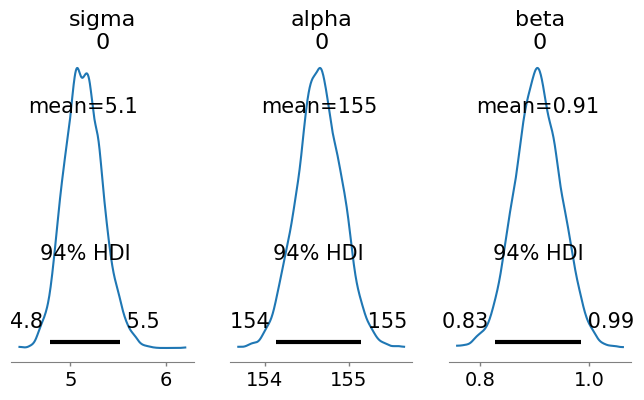

In [13]:
self.diag_posterior()

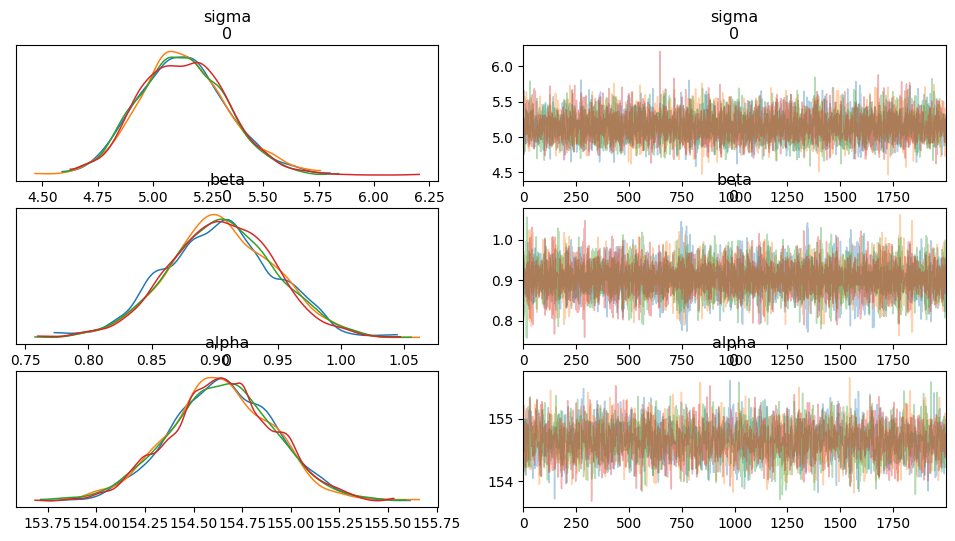

In [14]:
self.diag_traces()

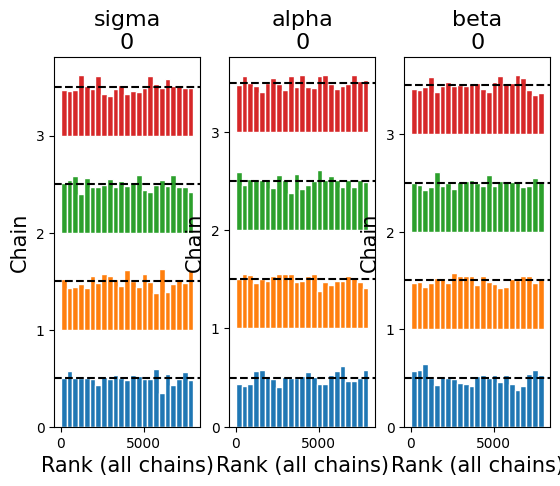

In [15]:
self.diag_rank()

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

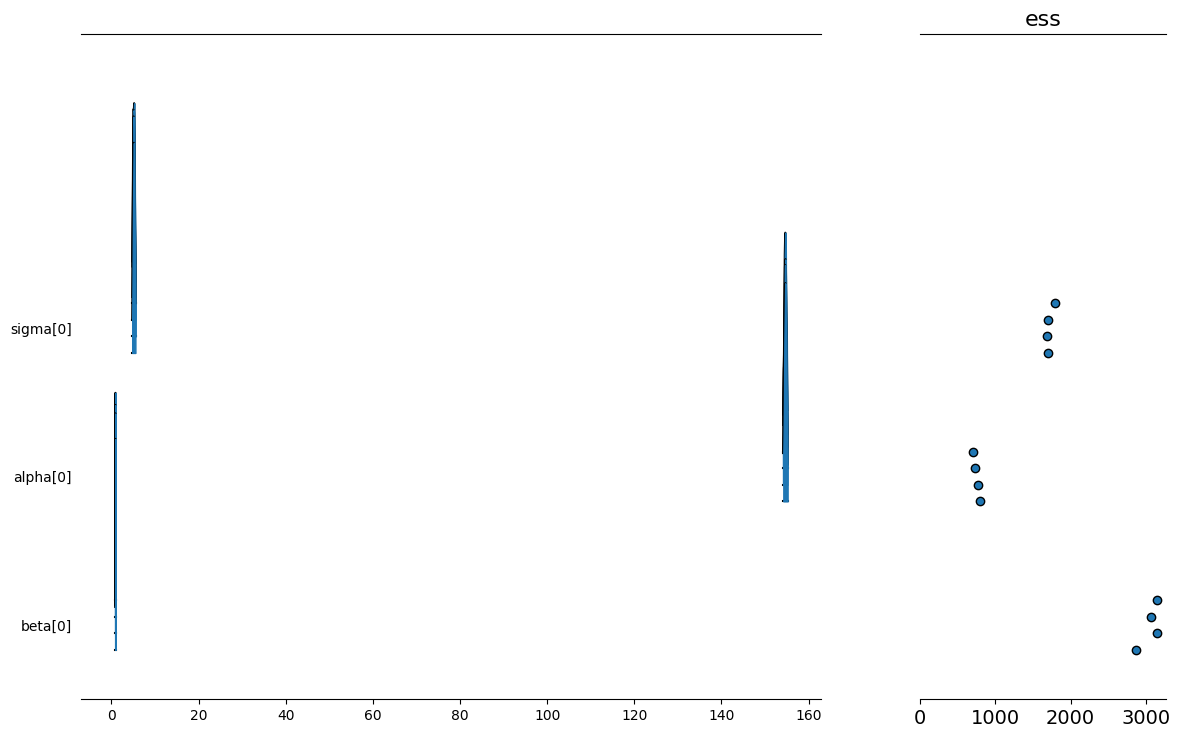

In [16]:
self.diag_forest()

/home/sosa/.local/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


array([[<Axes: ylabel='sigma\n0'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='alpha\n0'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='sigma\n0', ylabel='beta\n0'>,
        <Axes: xlabel='alpha\n0'>, <Axes: xlabel='beta\n0'>]],
      dtype=object)

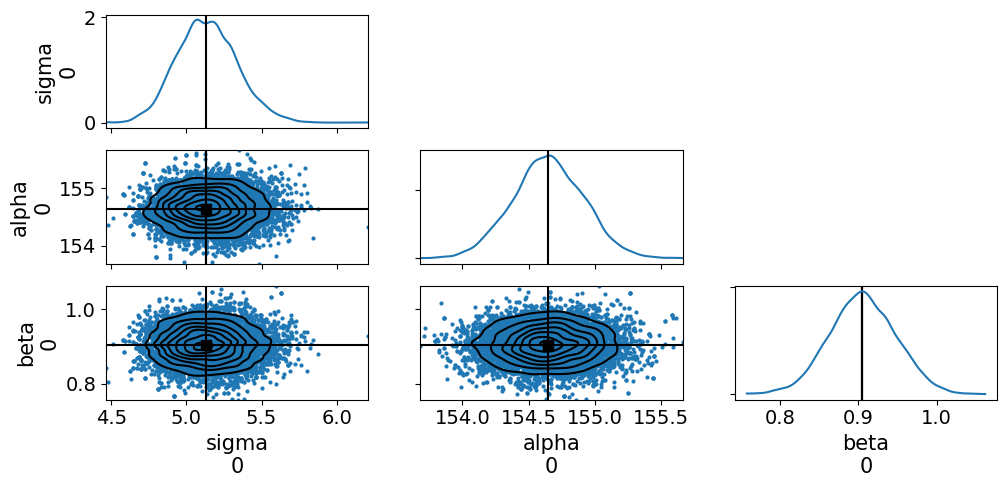

In [17]:
self.diag_pair()

array([[<Axes: title={'center': 'sigma\n0'}>,
        <Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'beta\n0'}>]], dtype=object)

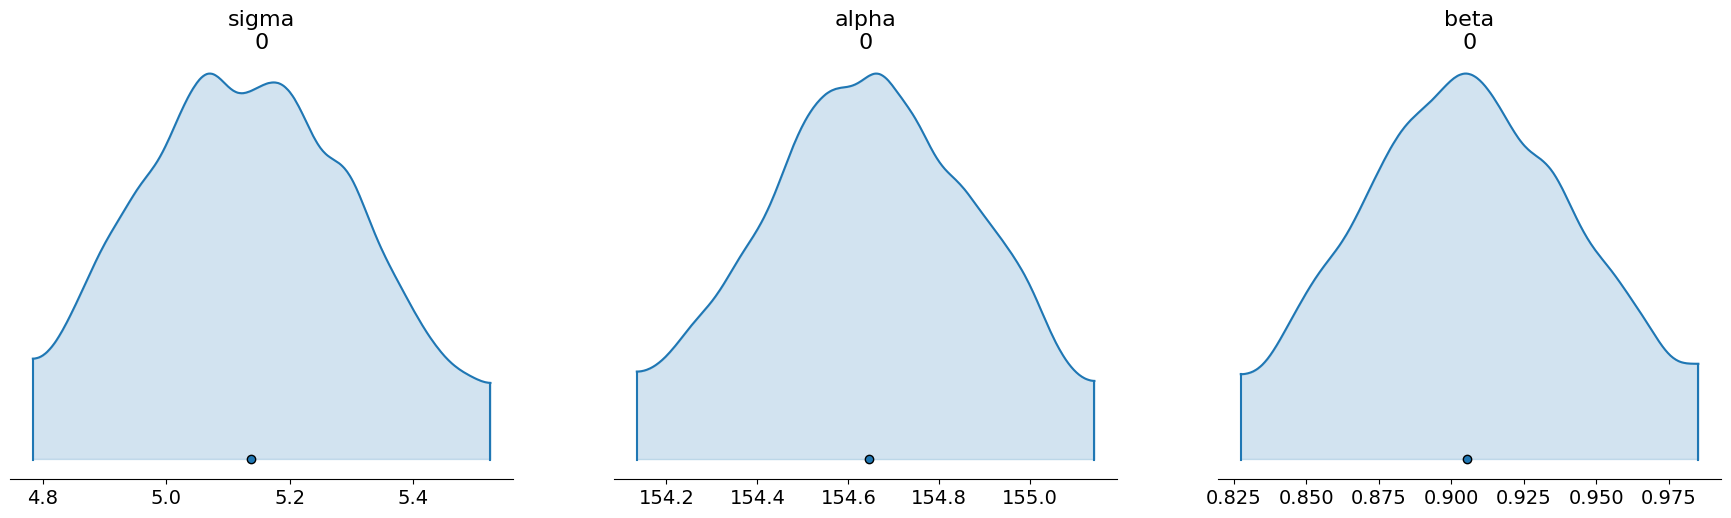

In [18]:
self.diag_density()

array([<Axes: title={'center': 'sigma\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'alpha\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'beta\n0'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

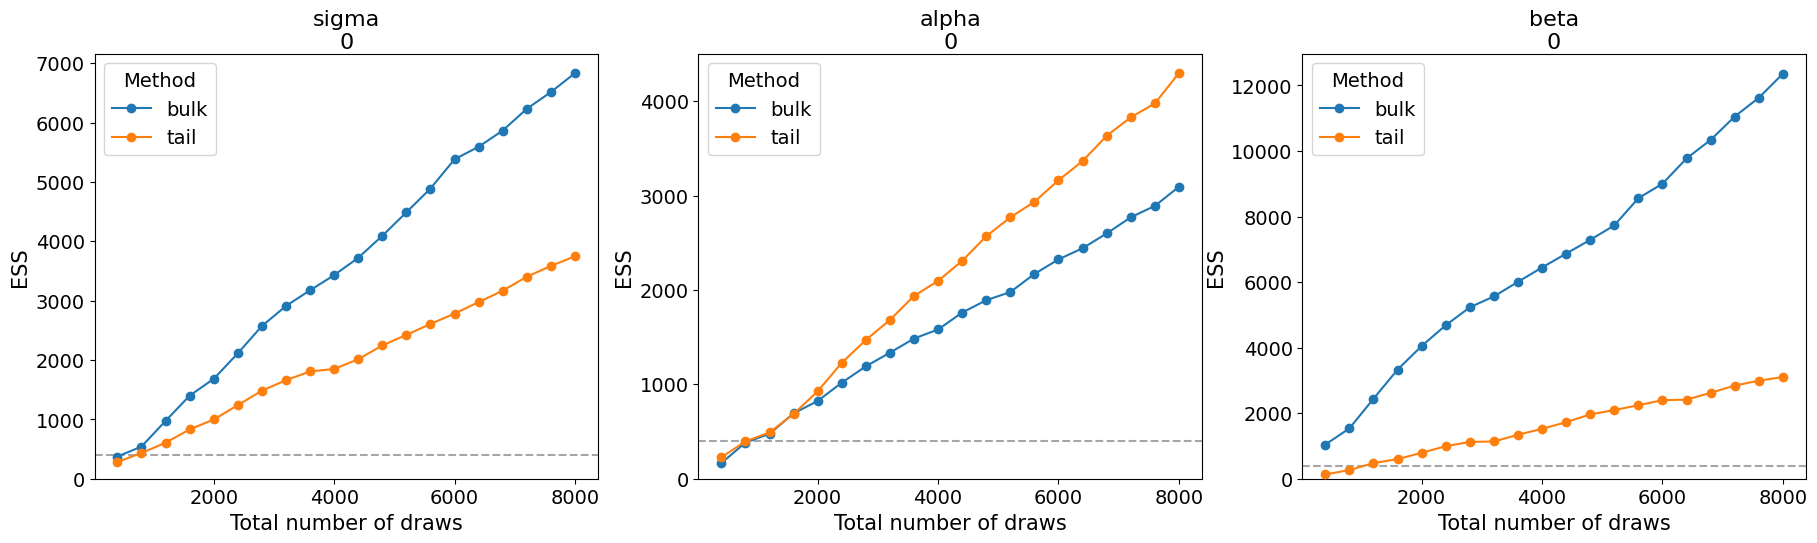

In [19]:
self.diag_plot_ess()